In [93]:
import os
import numpy as np
import geopandas as gpd

import xarray as xr
import cartopy.crs as ccrs
import shapely.geometry as sg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [94]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [95]:
data_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [144]:
data_dir = os.path.join(data_base,'CMORPH','1dy','CMORPH_Italy_1dy_1998_01_01_2024_01_31.nc')

DATA = xr.open_dataset(data_dir)

lon2d_CMORPH, lat2d_CMORPH  = np.meshgrid(DATA.lon.values, DATA.lat.values)

reso = 0.25

Region: Abruzzo
Region: Basilicata
Region: Calabria
Region: Campania
Region: Emilia-romagna
Region: Friuli venezia giulia
Region: Lazio
Region: Liguria
Region: Lombardia
Region: Marche
Region: Molise
Region: Piemonte
Region: Puglia
Region: Sardegna
Region: Sicilia
Region: Toscana
Region: Trentino-alto adige/sudtirol
Region: Umbria
Region: Valle d'aosta


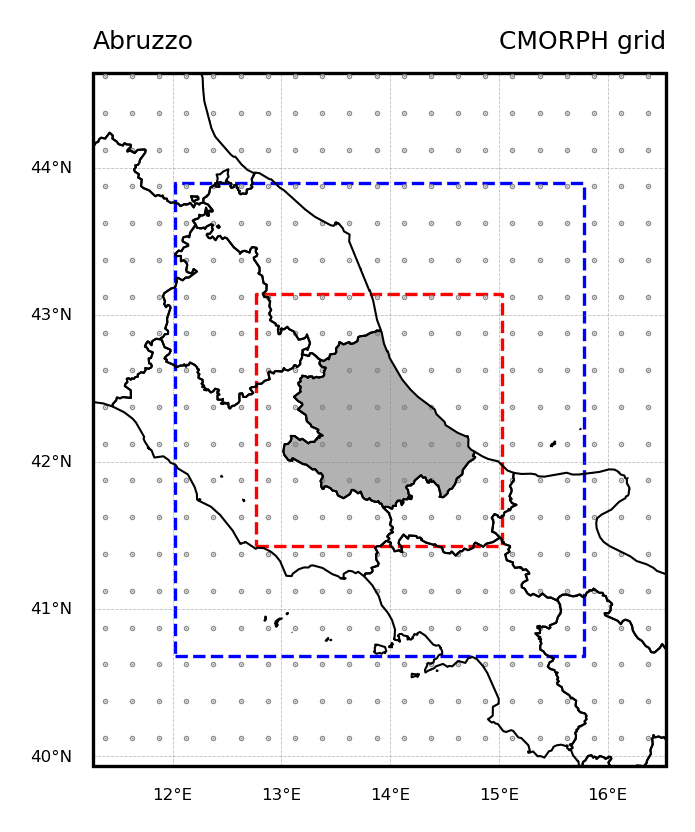

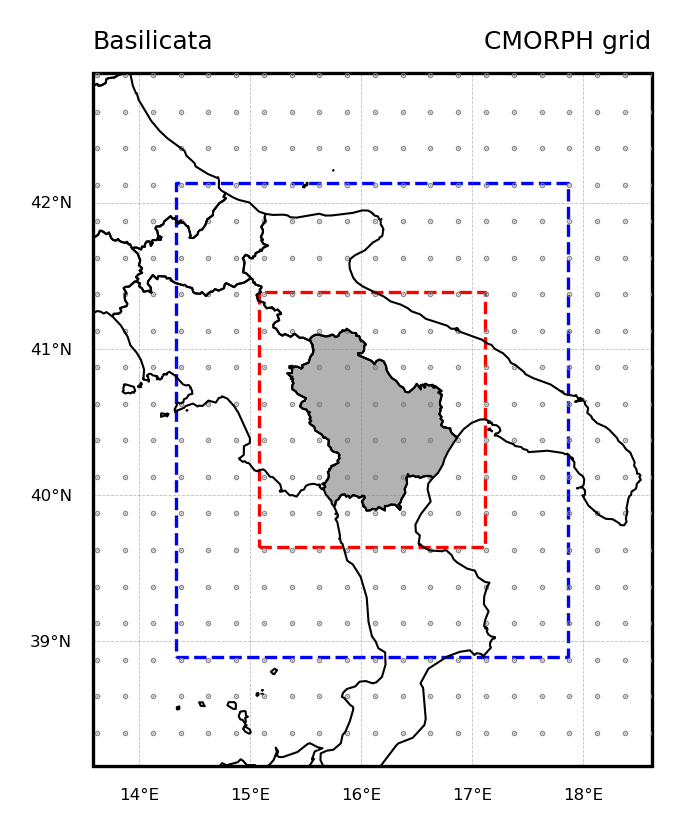

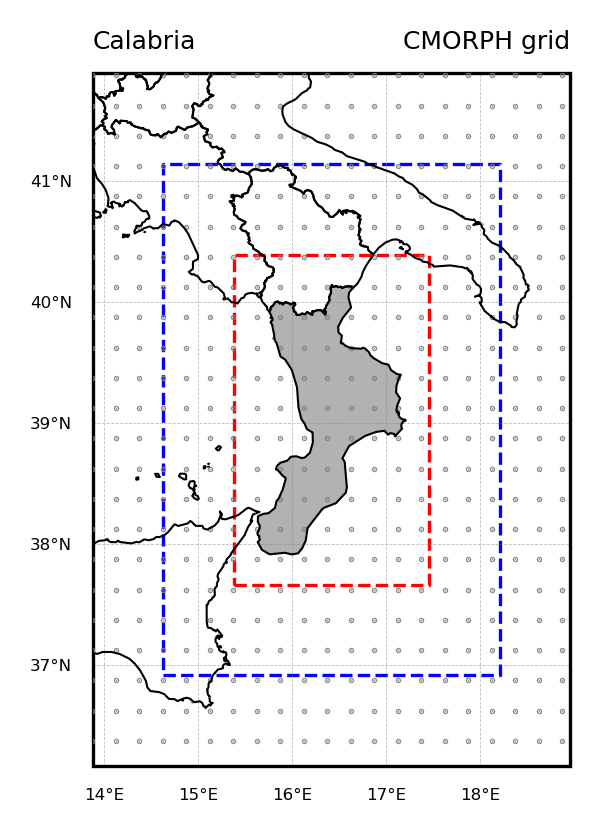

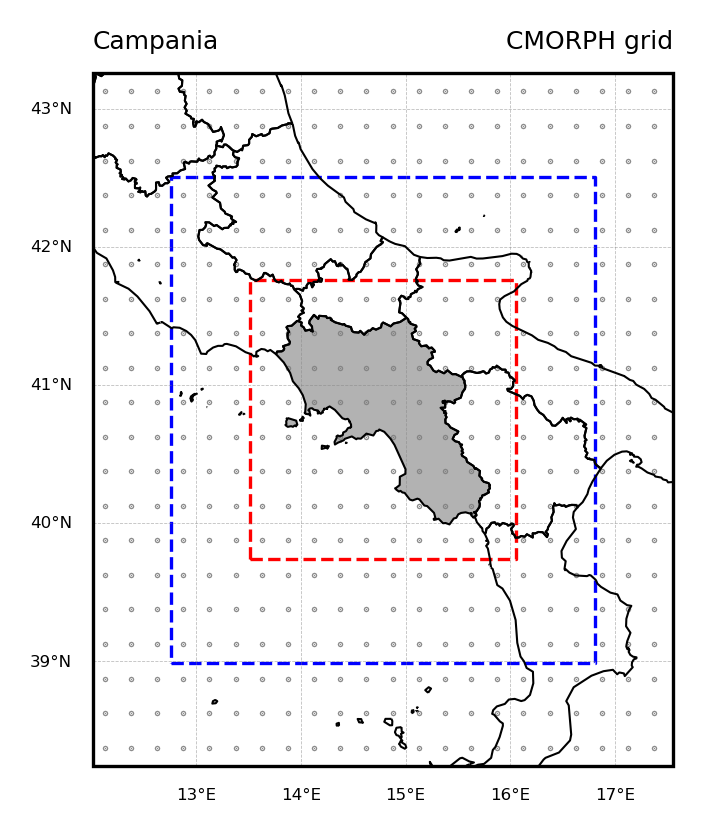

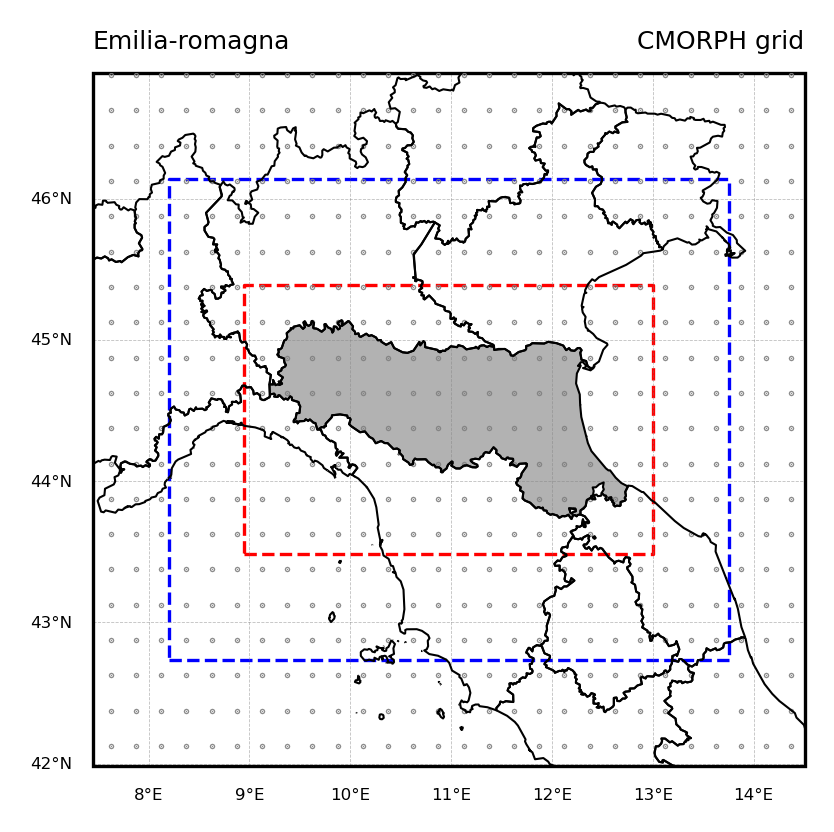

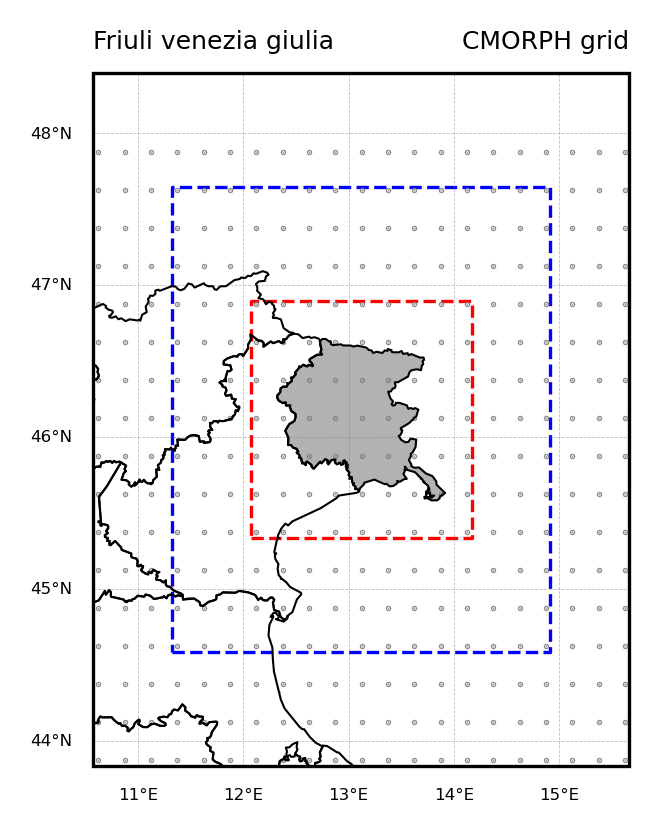

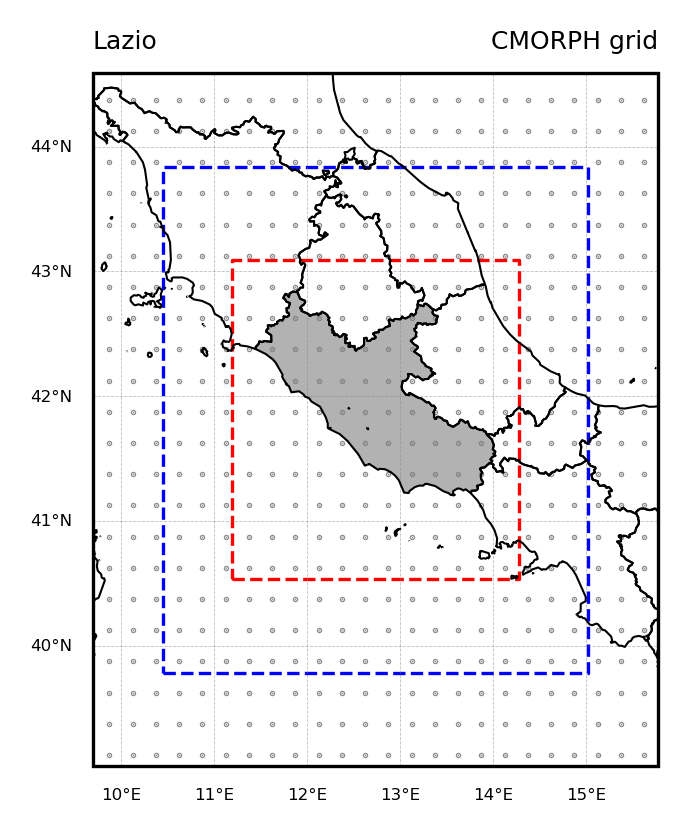

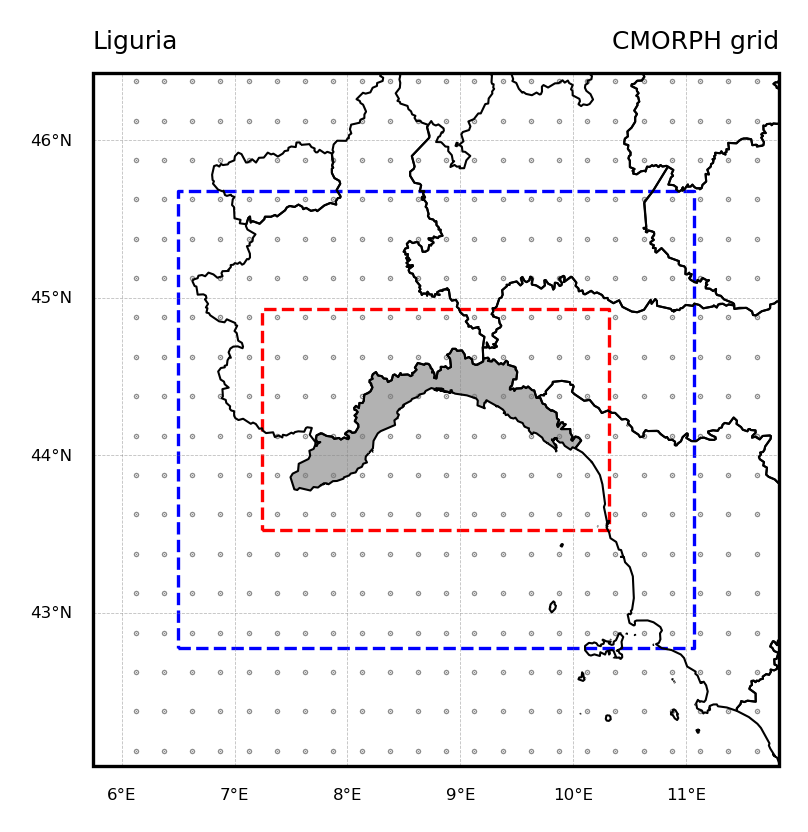

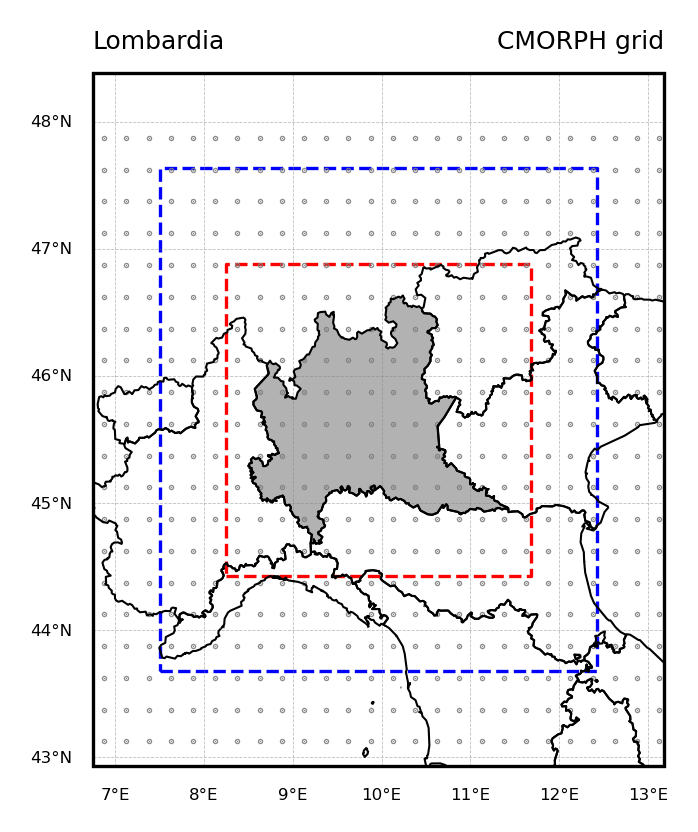

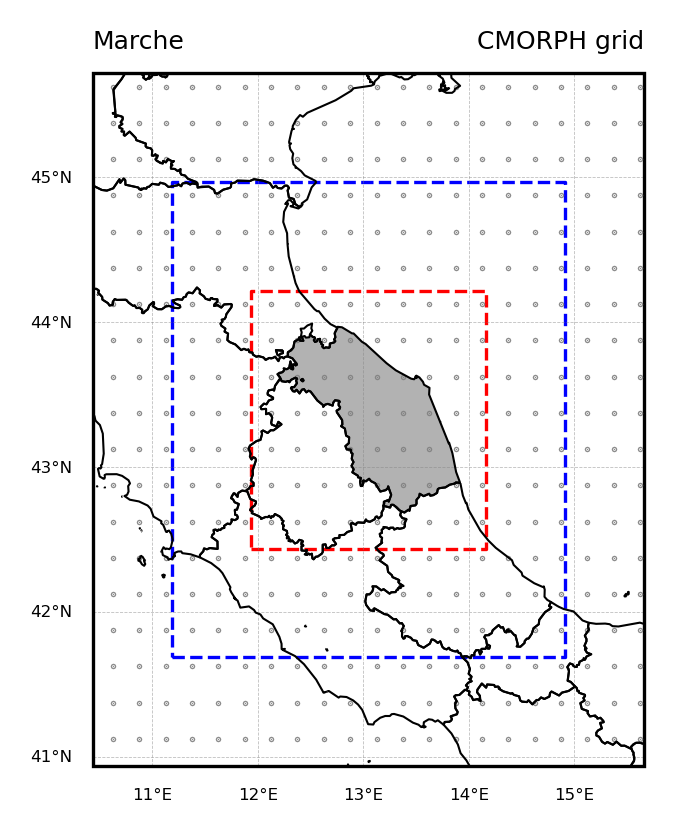

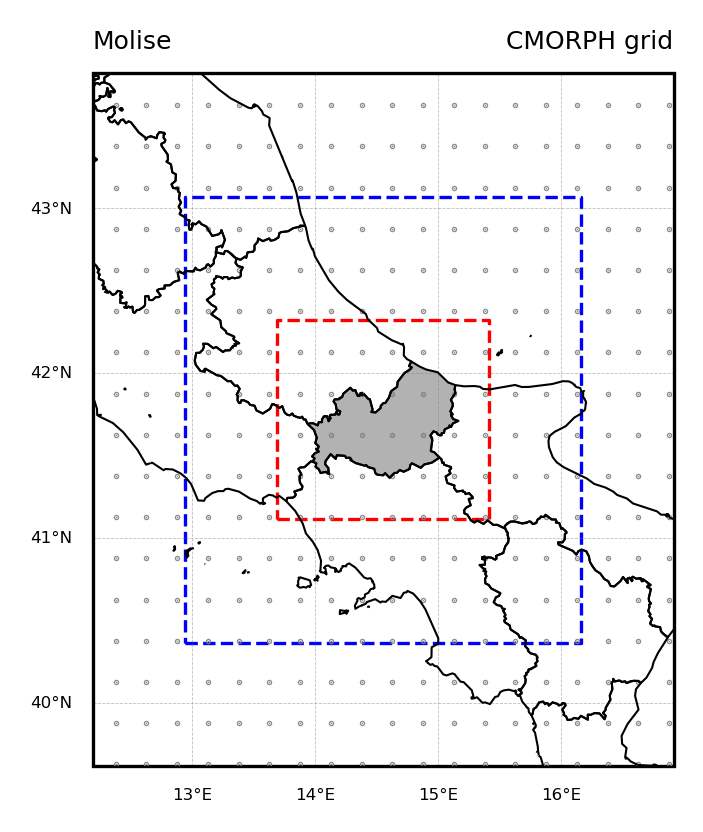

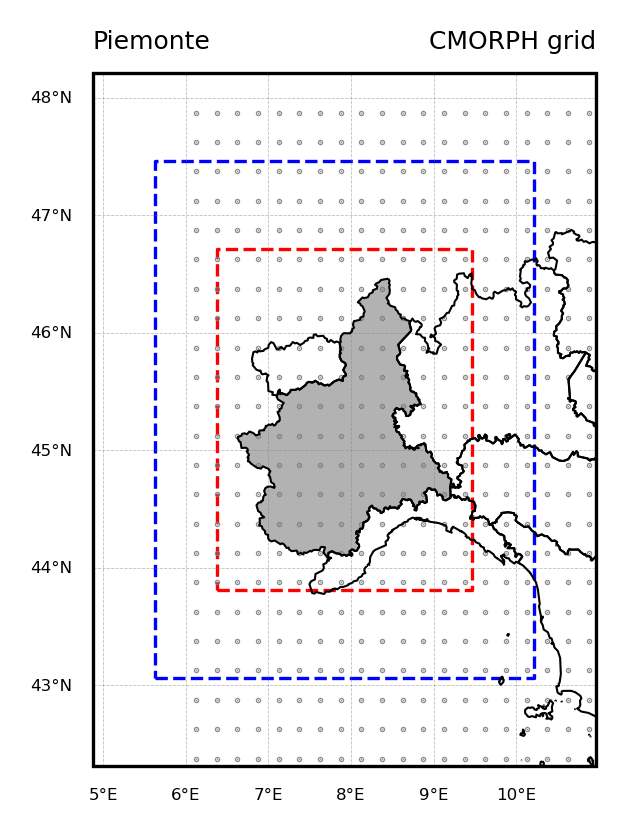

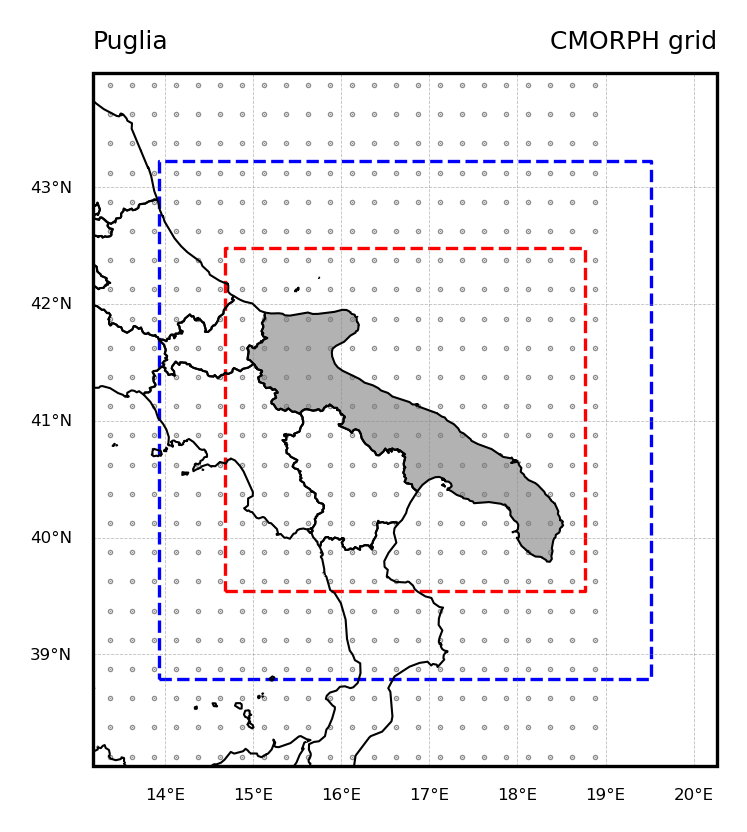

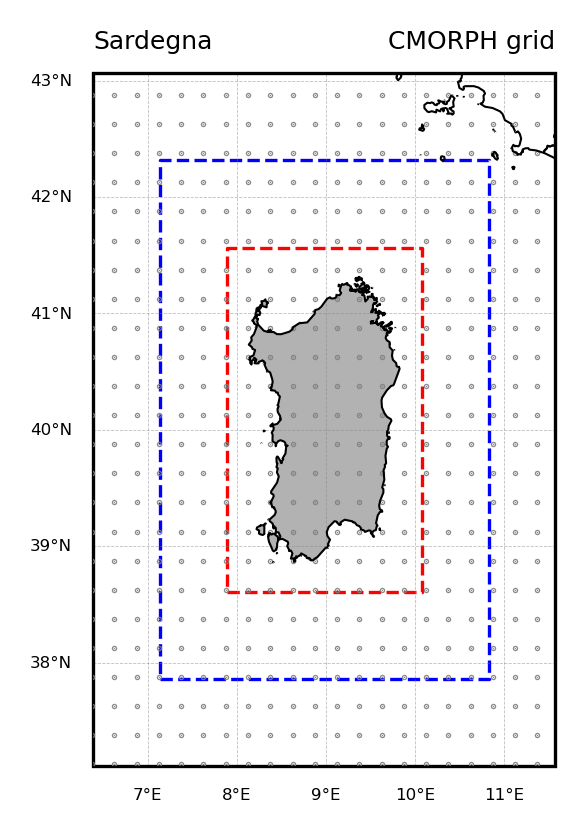

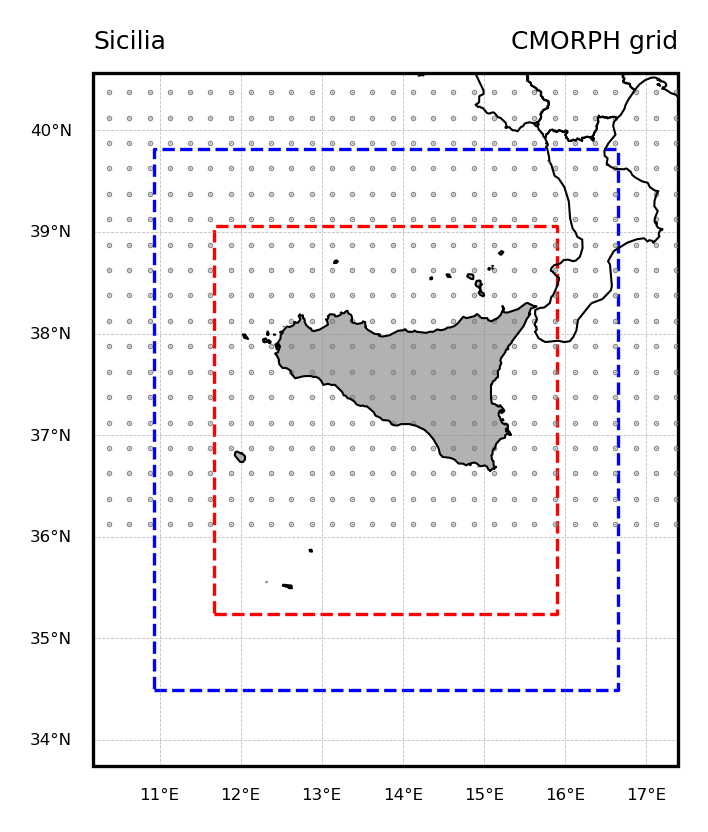

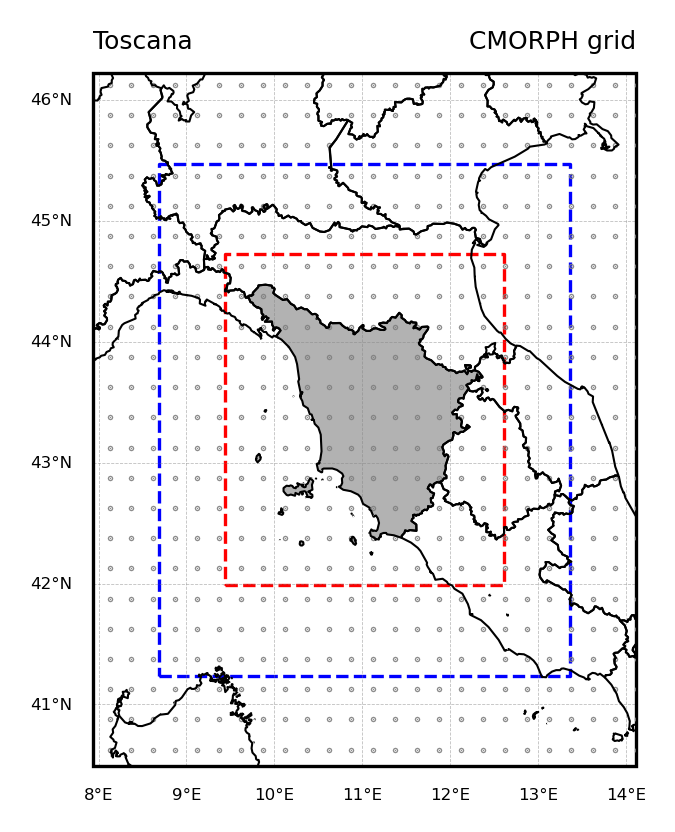

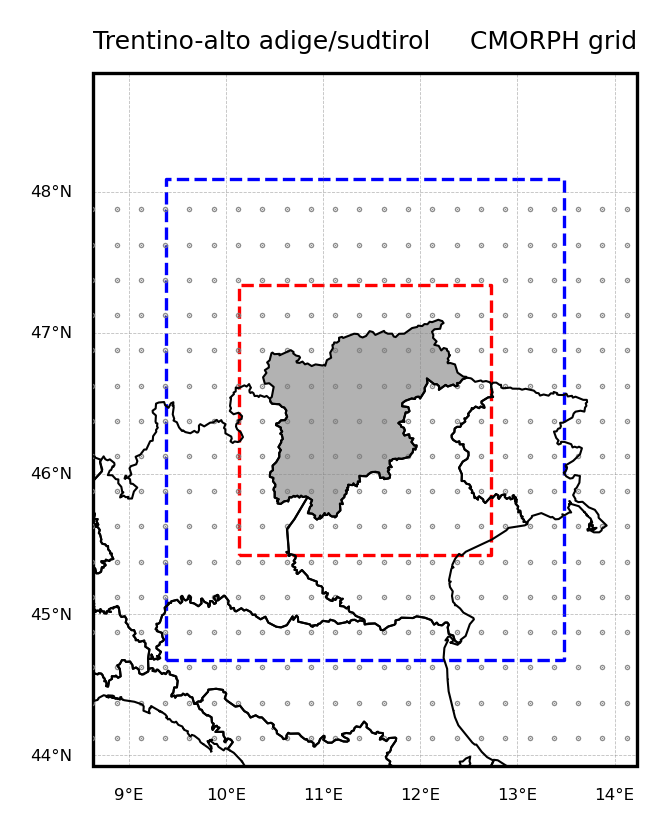

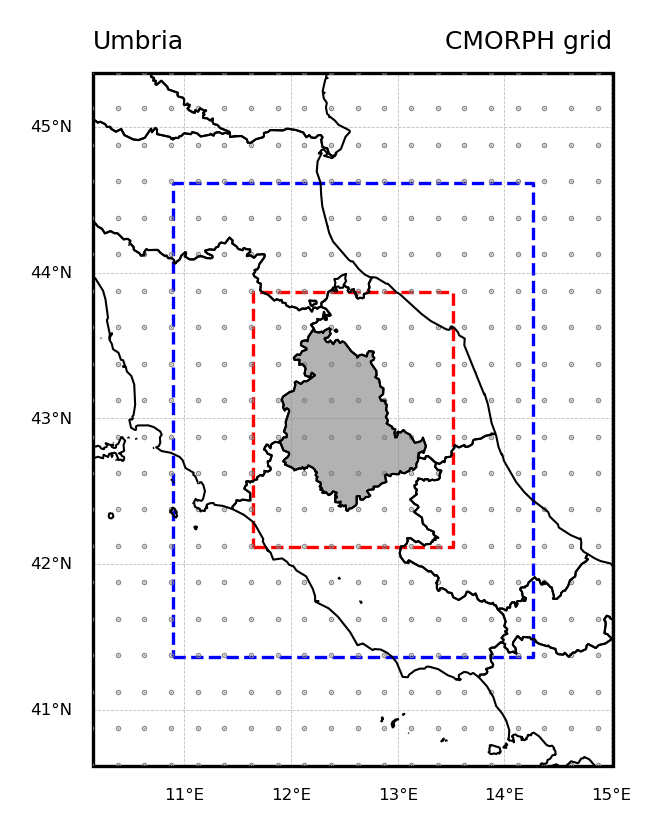

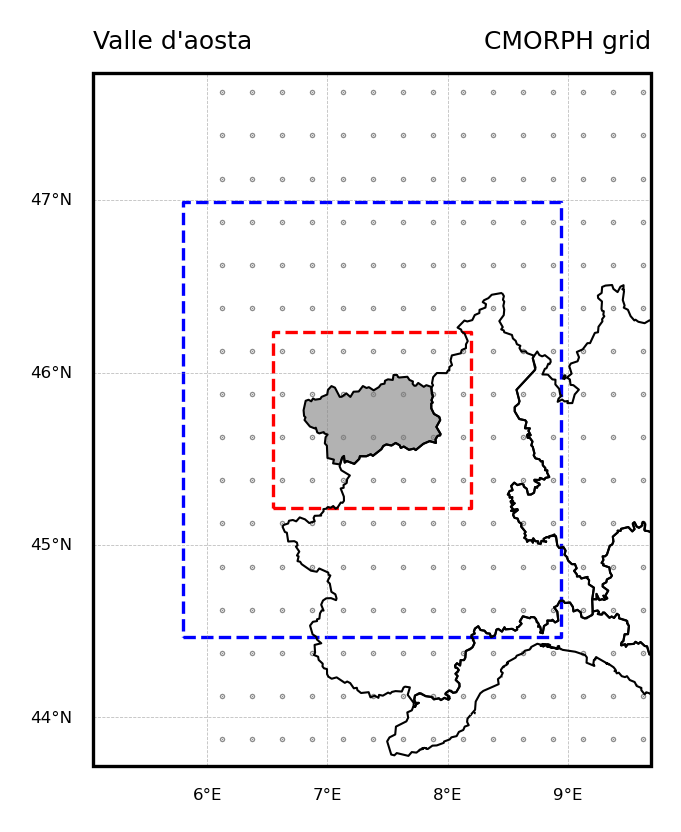

In [145]:
for nn in range(19):

    lon_min, lat_min, lon_max, lat_max = REGIONS.geometry[nn].bounds
    lon_min, lat_min, lon_max, lat_max = lon_min-reso, lat_min-reso, lon_max+reso, lat_max+reso
    print(f'Region: {REGIONS.name[nn]}')

    region_area = sg.Polygon([
            (lon_min, lat_min),
            (lon_max, lat_min),
            (lon_max, lat_max),
            (lon_min, lat_max),
            (lon_min, lat_min)
                            ])
    rect_area = gpd.GeoDataFrame(geometry=[region_area], crs="EPSG:4326")

    extend_area = sg.Polygon([
            (lon_min-3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_min-3*reso)
                            ])
    rect_extend = gpd.GeoDataFrame(geometry=[extend_area], crs="EPSG:4326")

    cmap = plt.cm.Spectral_r
    proj = ccrs.PlateCarree()

    fig = plt.figure(figsize=(4,3),dpi=300)
    gs = gridspec.GridSpec(1,1)

    # ==============================================================================
    ax1 = plt.subplot(gs[0, 0], projection = proj)
    ax1.set_extent([lon_min-1.5, lon_max+1.5, lat_min-1.5, lat_max+1.5],crs=proj)
    ax1.scatter(lon2d_CMORPH, lat2d_CMORPH, c='grey', s=0.1, alpha=0.9, zorder=10)
    REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
    gpd.GeoSeries(REGIONS.geometry[nn]).plot(facecolor='grey', ax=ax1, linewidth=0.5, zorder=2, alpha=0.6)
    rect_area.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
    rect_extend.plot(ax=ax1, edgecolor='b', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)

    gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
    gl.top_labels = False
    gl.bottom_labels = True
    gl.right_labels = False
    gl.left_labels =True
    gl.xlabel_style = {'size': 4, 'color': 'k'}
    gl.ylabel_style = {'size': 4, 'color': 'k'}

    ax1.set_title(REGIONS.name[nn], fontsize=6, loc='left')
    ax1.set_title('CMORPH grid', fontsize=6, loc='right')
    
    ax1.set_facecolor('white')
    fig.patch.set_alpha(0)

Region: Abruzzo
Region: Basilicata
Region: Calabria
Region: Campania
Region: Emilia-romagna
Region: Friuli venezia giulia
Region: Lazio
Region: Liguria
Region: Lombardia
Region: Marche
Region: Molise
Region: Piemonte
Region: Puglia
Region: Sardegna
Region: Sicilia
Region: Toscana
Region: Trentino-alto adige/sudtirol
Region: Umbria
Region: Valle d'aosta
Region: Veneto


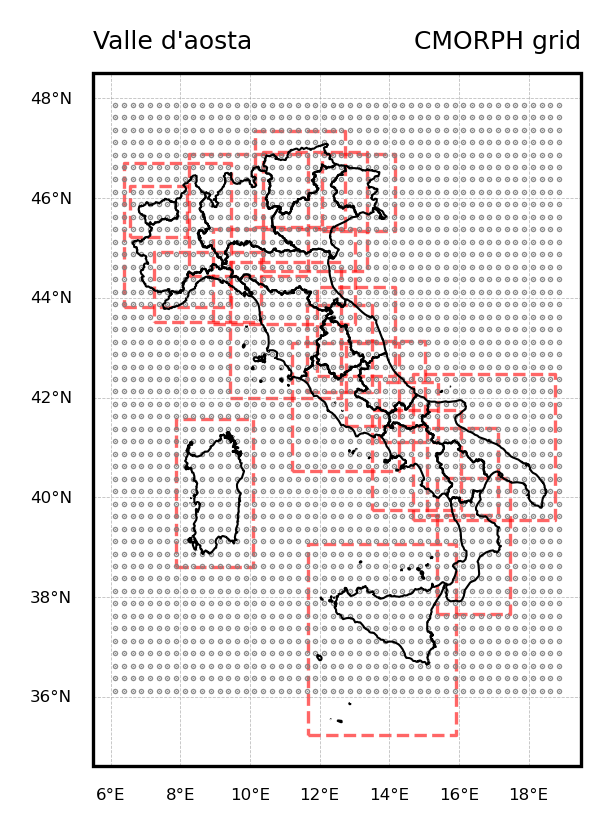

In [146]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([lon_min-1.5, lon_max+1.5, lat_min-1.5, lat_max+1.5],crs=proj)
ax1.scatter(lon2d_CMORPH, lat2d_CMORPH, c='grey', s=0.1, alpha=0.9, zorder=10)

REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.set_title(REGIONS.name[nn], fontsize=6, loc='left')
ax1.set_title('CMORPH grid', fontsize=6, loc='right')

for nn in range(20):

    lon_min, lat_min, lon_max, lat_max = REGIONS.geometry[nn].bounds
    lon_min, lat_min, lon_max, lat_max = lon_min-reso, lat_min-reso, lon_max+reso, lat_max+reso
    print(f'Region: {REGIONS.name[nn]}')

    region_area = sg.Polygon([
            (lon_min, lat_min),
            (lon_max, lat_min),
            (lon_max, lat_max),
            (lon_min, lat_max),
            (lon_min, lat_min)
                            ])
    rect_area = gpd.GeoDataFrame(geometry=[region_area], crs="EPSG:4326")

    extend_area = sg.Polygon([
            (lon_min-3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_min-3*reso)
                            ])
    rect_extend = gpd.GeoDataFrame(geometry=[extend_area], crs="EPSG:4326")

    rect_area.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1, alpha=0.6)
    # rect_extend.plot(ax=ax1, edgecolor='b', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
    
    ax1.set_facecolor('white')
    fig.patch.set_alpha(0)